In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

master_df = pd.read_csv("clean_master_dataset.csv", parse_dates=[
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
])

In [4]:
master_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_days,delivery_delay_days,delayed_flag,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,total_price,total_freight,total_item_value,total_items,payment_value,payment_installments,review_score,order_year,order_month,order_year_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,-8.0,0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,29.99,8.72,38.71,1,38.71,1.0,4.0,2017,10,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.0,-6.0,0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,118.70,22.76,141.46,1,141.46,1.0,4.0,2018,7,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,-18.0,0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,159.90,19.22,179.12,1,179.12,3.0,5.0,2018,8,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,-13.0,0,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,45.00,27.20,72.20,1,72.20,1.0,5.0,2017,11,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.0,-10.0,0,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,19.90,8.72,28.62,1,28.62,1.0,5.0,2018,2,2018-02


In [6]:
master_df.shape

(97007, 25)

In [8]:
master_df.describe()

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_days,delivery_delay_days,delayed_flag,customer_zip_code_prefix,total_price,total_freight,total_item_value,total_items,payment_value,payment_installments,review_score,order_year,order_month
count,97007,96993,97005,96999,97007,96999.000000,96999.000000,97007.000000,97007.000000,97007.000000,97007.000000,97007.000000,97007.000000,97006.000000,97006.000000,96361.000000,97007.000000,97007.000000
mean,2018-01-01 15:37:47.535074816,2018-01-02 03:01:25.057674240,2018-01-04 21:13:02.244719360,2018-01-14 04:58:15.062763264,2018-01-25 09:32:15.732473088,12.099537,-11.879803,0.067645,35201.946293,136.895653,22.780098,159.675751,1.142598,159.705107,2.931551,4.155717,2017.543507,6.030152
min,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00,0.000000,-147.000000,0.000000,1003.000000,0.850000,0.000000,9.590000,1.000000,9.590000,0.000000,1.000000,2016.000000,1.000000
25%,2017-09-13 19:55:58.500000,2017-09-14 07:25:28,2017-09-15 21:49:52,2017-09-25 20:11:17.500000,2017-10-05 00:00:00,6.000000,-17.000000,0.000000,11355.000000,45.900000,13.850000,61.810000,1.000000,61.840000,1.000000,4.000000,2017.000000,3.000000
50%,2018-01-20 13:20:35,2018-01-20 19:20:37,2018-01-24 01:14:44,2018-02-02 16:09:06,2018-02-16 00:00:00,10.000000,-12.000000,0.000000,24436.000000,86.000000,17.170000,105.220000,1.000000,105.240000,2.000000,5.000000,2018.000000,6.000000
75%,2018-05-05 10:59:43,2018-05-05 17:10:23,2018-05-08 13:41:00,2018-05-15 20:03:15.500000,2018-05-28 00:00:00,15.000000,-7.000000,0.000000,59061.000000,149.900000,24.020000,176.200000,1.000000,176.200000,4.000000,5.000000,2018.000000,8.000000
max,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,209.000000,188.000000,1.000000,99980.000000,13440.000000,1794.960000,13664.080000,21.000000,13664.080000,24.000000,5.000000,2018.000000,12.000000
std,NaN,NaN,NaN,NaN,NaN,9.547594,10.182253,0.251136,29842.086519,208.698701,21.532577,218.442738,0.540014,218.461608,2.715884,1.284986,0.503642,3.229851


In [12]:
total_revenue = master_df['payment_value'].sum()
total_orders = master_df['order_id'].nunique()
avg_order_value = master_df['payment_value'].mean()

print("Total Revenue:", total_revenue)
print("Total Orders:", total_orders)
print("Average Order Value:", avg_order_value)

Total Revenue: 15492353.59
Total Orders: 96478
Average Order Value: 159.7051067975177


In [14]:
unique_customers = master_df['customer_unique_id'].nunique()
print("Unique Customers:", unique_customers)

Unique Customers: 93358


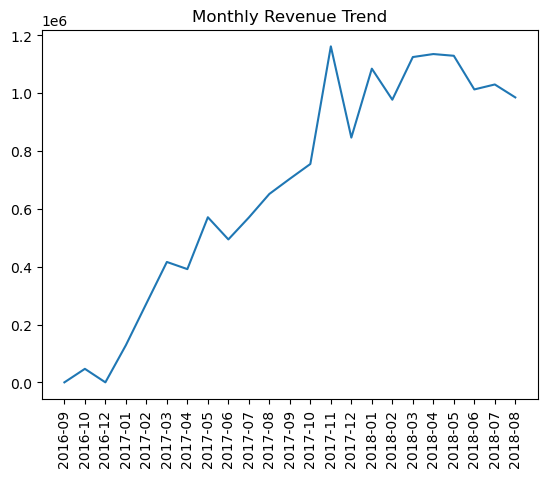

In [24]:
# Revenue Analysis
monthly_revenue = (
    master_df
    .groupby('order_year_month')['payment_value']
    .sum()
    .reset_index()
)

plt.figure()
plt.plot(monthly_revenue['order_year_month'].astype(str),
         monthly_revenue['payment_value'])

plt.xticks(rotation=90)
plt.title("Monthly Revenue Trend")
plt.show()

In [18]:
state_revenue = (
    master_df
    .groupby('customer_state')['payment_value']
    .sum()
    .sort_values(ascending=False)
)

state_revenue.head(10)

customer_state
SP    5799847.00
RJ    2063882.53
MG    1826872.47
RS     866206.87
PR     785305.81
SC     597148.45
BA     593541.16
DF     348624.23
GO     337747.38
ES     318491.23
Name: payment_value, dtype: float64

In [26]:
# Delivery Performance
avg_delivery_days = master_df['delivery_days'].mean()
print("Average Delivery Days:", avg_delivery_days)

Average Delivery Days: 12.099537108629987


In [28]:
delay_rate = master_df['delayed_flag'].mean() * 100
print("Delay Percentage:", delay_rate)

Delay Percentage: 6.764460296679621


In [30]:
master_df.groupby('delayed_flag')['review_score'].mean()

delayed_flag
0    4.289999
1    2.271025
Name: review_score, dtype: float64

In [32]:
# Customer Behavior Analysis
# Repeat Customer Rate
customer_orders = (
    master_df
    .groupby('customer_unique_id')['order_id']
    .nunique()
)

repeat_rate = (customer_orders > 1).mean() * 100
print("Repeat Customer Rate:", repeat_rate)


Repeat Customer Rate: 3.0002784978255748


In [36]:
# Revenue by Customer Type
master_df['customer_type'] = master_df['customer_unique_id'].map(
    lambda x: "Repeat" if customer_orders[x] > 1 else "One-Time"
)

master_df.groupby('customer_type')['payment_value'].mean()

customer_type
One-Time    160.714823
Repeat      145.314113
Name: payment_value, dtype: float64

In [50]:
master_df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'delivery_days', 'delivery_delay_days', 'delayed_flag',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'total_price', 'total_freight', 'total_item_value',
       'total_items', 'payment_value', 'payment_installments', 'review_score',
       'order_year', 'order_month', 'order_year_month', 'customer_type'],
      dtype='object')

In [52]:
master_df['review_given'] = master_df['review_score'].notnull().astype(int)

In [54]:
master_df['review_given'].value_counts()

review_given
1    96361
0      646
Name: count, dtype: int64

In [63]:
# Customer Satisfaction
# Average Rating
avg_rating = master_df['review_score'].mean()
print("Average Rating:", avg_rating)

Average Rating: 4.155716524320005


In [65]:
# Review Participation Rate
review_rate = master_df['review_given'].mean() * 100
print("Review Participation Rate:", review_rate)

Review Participation Rate: 99.33406867545641


In [67]:
# Correlation Check
master_df[['payment_value','delivery_days','review_score']].corr()

,payment_value,delivery_days,review_score
payment_value,1.000000,0.069354,-0.042118
delivery_days,0.069354,1.000000,-0.333616
review_score,-0.042118,-0.333616,1.000000
